# Mortgage Probability of Default & Mortgage Fraud
**Data Analyst: Frankie Ma**

***Introduction:*** Mortgage fraud and default pose significant risks to both lenders and borrowers in the U.S. housing market. With the rise of online services offering fake documentation and fraudulent verification, lenders face increasing difficulty in validating borrower income and intent. These schemes—often masked as novelty tools—can lead to occupancy misrepresentation, inflated credit profiles, and fraudulent loan approvals. As lenders like Fannie Mae and Freddie Mac tighten their risk protocols, the consequences of undetected fraud ripple through financial institutions, investors, and ultimately taxpayers. At the same time, mortgage defaults continue to trigger complex legal processes, including foreclosures, which carry steep financial and reputational costs. In this project, we apply machine learning models to assess default risk and explore how data-driven strategies can help lenders better detect anomalies, protect against fraudulent applications, and reduce financial losses across varying interest rate scenarios.

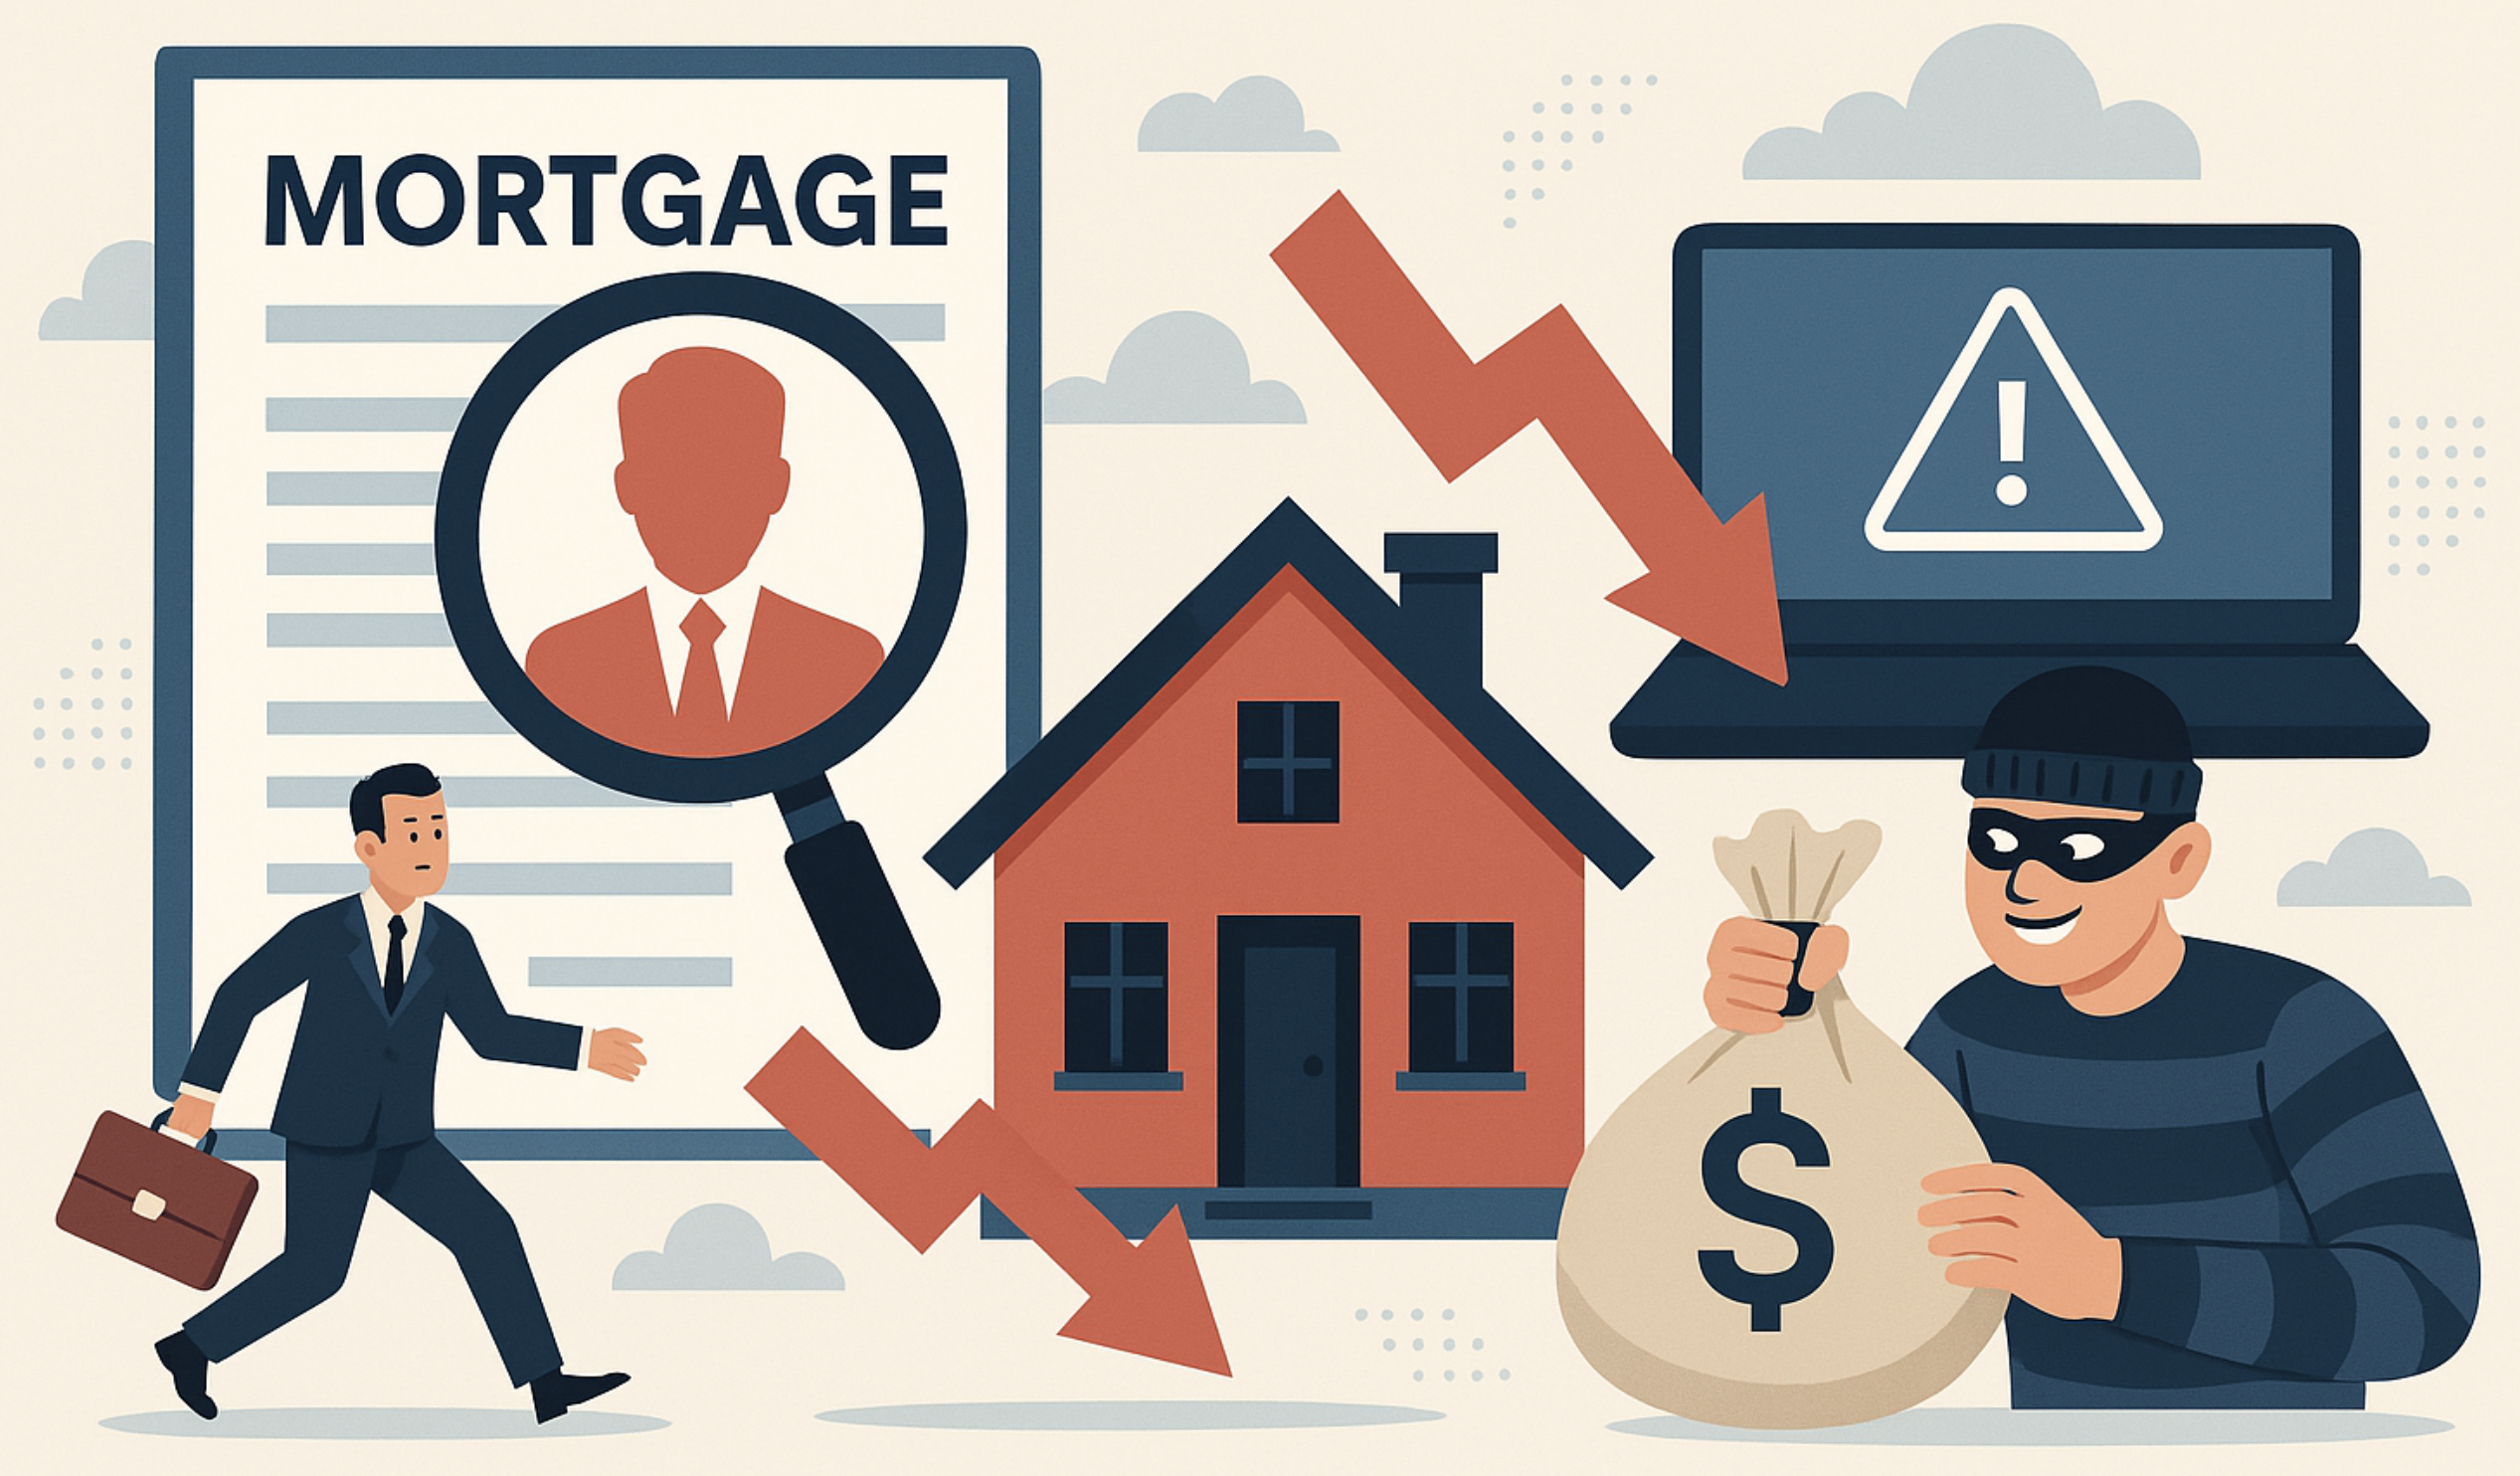

In [1]:
from IPython import display
display.Image("Mortgage.png")

[This picture is generated by AI]

***Project Goal:*** Our project aims to develop predictive models that identify high-risk mortgage loan applications by detecting potential defaults and fraudulent behavior. By leveraging machine learning and profit-based evaluation across different interest rate scenarios, we seek to help lenders make more informed, data-driven decisions that reduce financial exposure and enhance loan portfolio quality.

# Table of Contents
- <b>[Section 1 Anomaly Detection through Feature Engineering](#1)</b>
  - [1.1 Target Encoding](#11)
    - [1.1.1 Data Spliting](#111)
    - [1.1.2 Feature enhancement for the categorical variables](#112)
  - [1.2 Imputing Missing Values](#12)
- <b>[Section 2 Model Building](#2)</b>
  - [2.1 Decision Tree with Randomized Search](#21)
    - [2.1.1 Accuracy](#211)
    - [2.1.2 Confusion Matrix](#212)
    - [2.1.3 ROC-AUC and Visualization](#213)
    - [2.1.4 Precision-Recall](#214)
    - [2.1.5 F1 Score](#215)
    - [2.1.6 Gains Table](#216)
    - [2.1.7 K-S Statistic](#217)
    - [2.1.8 Cumulative Lift](#218)
  - [2.2 Logistic Regression](#22)
    - [2.1.1 Accuracy](#221)
    - [2.2.2 Confusion Matrix](#222)
    - [2.2.3 ROC-AUC and Visualization](#223)
    - [2.2.4 Precision-Recall](#224)
    - [2.2.5 F1 Score](#225)
    - [2.2.6 Gains Table](#226)
    - [2.2.7 K-S Statistic](#227)
    - [2.2.8 Cumulative Lift](#228)
- <b>[Section 3 Initialize H2O](#3)</b>
  - [3.1 Initialize H2O](#31)
  - [3.2 H2O Modeling](#32)
  - [3.3 Top Model Selection](#33)
  - [3.4 Top Model Performance](#34)
    - [3.4.1 Accuracy](#341)
    - [3.4.2 Confusion Matrix](#342)
    - [3.4.3 ROC-AUC and Visualization](#343)
    - [3.4.4 Precision-Recall](#344)
    - [3.4.5 F1 Score](#345)
    - [3.4.6 Gains Table](#346)
    - [3.4.7 K-S Statistic](#347)
    - [3.4.8 Cumulative Lift](#348)
- <b>[Section 4 Fight Against Overfitting](#4)</b>
  - [4.1 Decision Tree](#41)
  - [4.2 Logistic Regression](#42)
  - [4.3 H2O](#43)
  - [4.4 Model Performance](#44)
- <b>[Section 5 Profit & Loss Calculations (P&L)](#5)</b>
  - [5.1 Interest Rate = 4%](#51)
    - [5.1.1 Decision Tree](#511)
    - [5.1.2 Logistic Regression](#512)
    - [5.1.3 Best Model](#513)
  - [5.2 Interest Rate = 8%](#52)
    - [5.2.1 Decision Tree](#541)
    - [5.2.2 Logistic Regression](#542)
    - [5.2.3 Best Model](#523)
  - [5.3 Interest Rate = 12%](#53)
    - [5.3.1 Decision Tree](#531)
    - [5.3.2 Logistic Regression](#532)
    - [5.3.3 Best Model](#533)
  - [5.4 Model Comparison](#54)
- <b>[Section 6 Summary & Conclusions](#6)</b>

In [2]:
# Before we get started, let's load all the packages we are going to use in this project.
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
#from wordcloud import WordCloud

from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.facecolor'] = '#00000000'

import os 
#from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

## Section 1 Anomaly Detection through Feature Engineering <a class="anchor" id="1"></a>

In [3]:
df = pd.read_csv('XYZloan_default_llm.csv')
df.head()

Unnamed: 0.1  Unnamed: 0  AP001  AP002  AP003 AP006  AP007  AP008  CR004  \
0             4       76031     33      1      3    h5      4      3      4   
1             5       23312     34      1      3    h5      5      5      3   
2             9       66033     36      2      1   ios      2      2      3   
3            10       41847     28      1      1   ios      5      5      3   
4            13       28275     35      2      4    h5      3      3      4   

   CR009  ...  TD005  TD006  TD009  TD010  TD013 TD014  TD022  TD024  \
0  63100  ...      4      1      4      1      4     1   10.0    0.0   
1  53370  ...      3      1      6      2      7     2   15.0   10.0   
2   5400  ...      4      2      4      2      5     2   25.0    0.0   
3   2000  ...      4      4      7      4      7     4   25.0    6.0   
4  27704  ...      4      1      4      1      7     1   25.0    0.0   

   loan_default                                             reason  
0             1  I’d really appreciate if we could move faster ...  
1             1  We’re trying to align the closing date with a ...  
2             1  It would really help to close this week so I c...  
3             1  There are some logistics around my move that m...  
4             1  I’d like to close by Friday if possible—the se...  

[5 rows x 32 columns]

In [4]:
columns = ['Unnamed: 0.1', 'Unnamed: 0', 'AP001', 'AP002', 'AP003', 'AP006',
       'AP007', 'AP008', 'CR004', 'CR009', 'CR015', 'CR017', 'CR018', 'CR019',
       'MB005', 'MB007', 'PA022', 'PA023', 'PA028', 'PA029', 'PA031', 'TD001',
       'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD022', 'TD024',
       'loan_default', 'reason']
data = df[columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  16000 non-null  int64  
 1   Unnamed: 0    16000 non-null  int64  
 2   AP001         16000 non-null  int64  
 3   AP002         16000 non-null  int64  
 4   AP003         16000 non-null  int64  
 5   AP006         16000 non-null  object 
 6   AP007         16000 non-null  int64  
 7   AP008         16000 non-null  int64  
 8   CR004         16000 non-null  int64  
 9   CR009         16000 non-null  int64  
 10  CR015         16000 non-null  int64  
 11  CR017         16000 non-null  int64  
 12  CR018         16000 non-null  int64  
 13  CR019         16000 non-null  int64  
 14  MB005         15441 non-null  float64
 15  MB007         16000 non-null  object 
 16  PA022         15918 non-null  float64
 17  PA023         15918 non-null  float64
 18  PA028         15918 non-nu

###  1.1 Target Encoding <a class="anchor" id="11"></a>

In [5]:
# specify categorical & numeric data type
cat_var = ['AP006', 'MB007', 'reason']
num_var = ['Unnamed: 0.1', 'Unnamed: 0', 'AP001', 'AP002', 'AP003', 'AP007', 
           'AP008', 'CR004', 'CR009', 'CR015', 'CR017', 'CR018', 'CR019',
           'MB005', 'PA022', 'PA023', 'PA028', 'PA029', 'PA031', 'TD001',
           'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD022', 'TD024']
X_vars = cat_var + num_var
target = 'loan_default'
data[target].value_counts()

loan_default
0    12924
1     3076
Name: count, dtype: int64

#### 1.1.1 Data Spliting <a class="anchor" id="111"></a>

In [6]:
X = data.drop(target, axis = 1)
y = data[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
[X_train.shape,X_test.shape, y_train.shape, y_test.shape]

[(12000, 31), (4000, 31), (12000,), (4000,)]

#### 1.1.2 Feature enhancement for the categorical variables <a class="anchor" id="112"></a>
In this section, we are going to create a new set of mean-encoded variables for the categorical variables, then to use the X-train to get the mean first to apply to the test data afterwards.

In [9]:
from category_encoders import target_encoder as te
ec = te.TargetEncoder()

X_train_m = pd.DataFrame()
X_test_m = pd.DataFrame()

for var in cat_var:
    X_train_m[var+'_D'] = ec.fit_transform(X_train[var],y_train)
    X_test_m[var+'_D'] = ec.transform(X_test[var])

X_train_m

AP006_D   MB007_D      reason_D
8928   0.188905  0.189318  4.365192e-05
9895   0.188905  0.189318  1.774992e-05
14163  0.220118  0.245247  0.000000e+00
14352  0.180544  0.164782  7.235891e-07
15916  0.180544  0.178959  3.017956e-16
...         ...       ...           ...
13123  0.188905  0.189318  1.318461e-06
3264   0.188905  0.189318  0.000000e+00
9845   0.188905  0.189318  0.000000e+00
10799  0.180544  0.178959  4.345156e-04
2732   0.188905  0.189318  4.984015e-01

[12000 rows x 3 columns]

### 1.2 Imputing Missing Values <a class="anchor" id="12"></a>

In [20]:
X_train_numvar = X_train[num_var]
missing_columns = X_train_numvar.columns[X_train_numvar.isnull().sum() > 0]

# Display the columns with missing values
missing_columns

Index(['MB005', 'PA022', 'PA023', 'PA028', 'PA029', 'PA031', 'TD022', 'TD024'], dtype='object')

In [21]:
for col in missing_columns:
    mean_value = X_train[col].mean()
    # Impute the missing values in both X_train and X_test
    X_train[col].fillna(mean_value, inplace=True)
    X_test[col].fillna(mean_value, inplace=True)

## Section 2 Model Building <a class="anchor" id="obs"></a>

The categorical columns are in `X_train_dummy` while the numerical columns are filled with mean values in `X_train[num_var]`. To model the data for following analysis, we will combine the `X_train_dummy` and `X_train[num_var]` (similar for test data).

In [25]:
# modeling data
X_train_model = pd.concat([X_train_m, X_train[num_var]], axis=1)
X_train_model.shape

X_test_model = pd.concat([X_test_m, X_test[num_var]], axis=1)
[X_train_model.shape, X_test_model.shape]

[(12000, 33), (4000, 32)]

### 2.1 Decision Tree with Randomized Search <a class="anchor" id="21"></a>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier # classification
from sklearn.tree import DecisionTreeRegressor # regression

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'log_loss', 'entropy']
}
dtree = DecisionTreeClassifier(random_state=42,class_weight='balanced')

random_search = RandomizedSearchCV(
    estimator=dtree,
    param_distributions=param_grid,
    n_iter=20,              # Number of parameter settings sampled
    scoring='accuracy',     # Metric to optimize
    cv=5,                   # 5-fold cross-validation
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)
random_search.fit(X_train_model, y_train)

Since we had an imbalanced dataset (as stated below), using `class_weight = balanced` can automatically help us adjust the weight of each class inversely proportional to its frequency in the training data. It penalizes mistakes on minority classes more heavily during training, encouraging the model to pay attention to rare outcomes.
| Class | Count |
| ----- | ----- |
| 0     | 12924 |
| 1     | 3076  |

In [ ]:
best_dtree_model = random_search.best_estimator_
best_dtree_train_proba = best_dtree_model.predict_proba(X_train_model)
best_dtree_test_proba = best_dtree_model.predict_proba(X_test_model)
best_dtree_train_pred = best_dtree_model.predict(X_train_model) 
best_dtree_test_pred = best_dtree_model.predict(X_test_model)

#### 2.1.1 Accuracy <a class="anchor" id="211"></a>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
print('The test data:',accuracy_score(y_test,best_dtree_test_pred))

The accuracy is extremly high (approximately to 1), it definitely stands for good accuracy.

#### 2.1.2 Confusion Matrix <a class="anchor" id="212"></a>

In [ ]:
best_dtree_cm = pd.DataFrame(confusion_matrix(y_test,best_dtree_test_pred))
best_dtree_cm.rename(columns={0:'Predicted Negative', 1:'Predicted Positive'},
         index = {0:'Actual Negative',1:'Actual Positive'},inplace=True)
best_dtree_cm

The confusion matrix has shown the specific result of the predictions, here we can see why the accuracy is 0.99775, that we have 9 false positive.

#### 2.1.3 ROC-AUC and Visualization <a class="anchor" id="213"></a>

In [ ]:
best_dtree_roc_auc_value = roc_auc_score(y_test,best_dtree_test_pred)
best_dtree_roc_auc_value

In [ ]:
def plot_roc(y_true,y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc_value = roc_auc_score(y_true,y_prob)
    lw=2
    plt.figure(figsize=(6,4))
    plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
    plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()
    
plot_roc(y_test, best_dtree_test_proba[:,1])

The ROC curve for the decision tree model shows excellent discriminatory power, with an AUC of 0.994. The curve hugs the top-left corner, indicating a high true positive rate across most thresholds and a very low false positive rate—evidence of strong classification performance

#### 2.1.4 Precision-Recall <a class="anchor" id="214"></a>

There's usually a trade-off between precision score and recall score for predictive models.

In [ ]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve

def ROC_PR(y_actual, y_pred):
    # ROC
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.3f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.3f}'.format(average_precision))
    plt.show()
    
ROC_PR(y_test, best_dtree_test_proba[:,1])

- The precision-recall curve for the decision tree shows a high performance with a PR AUC of 0.990.
- This indicates the model maintains excellent precision across nearly all recall values — effectively identifying defaults with few false positives.

#### 2.1.5 F-1 Score <a class="anchor" id="215"></a>

In [ ]:
from sklearn.metrics import f1_score
# Calculate the F1 score
f1 = f1_score(y_test, best_dtree_test_pred)  # y_test is the actual, test_pred is the prediction
print("F1 Score:", f1)

#### 2.1.6 Gains Table <a class="anchor" id="216"></a>

In [ ]:
def gains_table_profit(Y_test,y_pred):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = Y_test
    df_prep['pred'] =y_pred
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    gains['revenue'] = approved_load * irr *  gains['non_actual']
    gains['cost'] = approved_load *  gains['actual']
    gains['profit'] = gains['revenue'] - gains['cost']
    return(gains)
    
# Assume the following values
approved_load = 10000
irr = 0.10 # annual interest rate

best_dtree_gains = gains_table_profit(y_test,best_dtree_test_proba[:,1])
best_dtree_gains

Key observations:
- Profit begins to appear starting from the 2nd decile, as the cost reduces to 0 and revenues from non-defaulters increase.
- Peak profitability is observed in deciles 3 through 7, each consistently returning $400,000 in profit.
- The maximum cumulative profit is slightly impacted by minor costs reappearing in some deciles (e.g., deciles 4, 8, 9).
- Overall, the model identifies non-defaulters relatively well after the first decile, but some inefficiencies exist in the earlier deciles.

#### 2.1.7 K-S Statistic <a class="anchor" id="217"></a>

In [ ]:
best_dtree_gains[['percent_cum_actual','percent_cum_non_actual']].plot.line()
plt.show()

- The blue line (percent_cum_actual) reaches nearly 100% by the second decile, indicating that almost all actual positives (e.g. defaults/fraud cases) are captured within the top 20% of predicted probabilities.
- However, the orange line (percent_cum_non_actual) also increases steadily, showing that a larger portion of false positives are included as we go down the deciles.
- This means the model is highly concentrated early on but becomes less selective in lower deciles.

#### 2.1.8 Cumulative Lift <a class="anchor" id="218"></a>

Cumulative lift is a measure of the effectiveness of a predictive model (calculated as the ratio between the results get with and without the predictive).

In [ ]:
best_dtree_gains['lift'].plot.line()
plt.show()

The cumulative lift chart for the decision tree model shows strong predictive performance in the top deciles, with the first decile achieving a lift of over 5.5, indicating highly effective identification of likely defaulters. However, similar to the logistic regression model, the lift steadily declines across lower deciles, reflecting reduced predictive strength. Overall, the model is effective in prioritizing the highest-risk cases, though its separation power diminishes as predictions move down the score distribution.

### 2.2 Logistic Regression <a class="anchor" id="22"></a>
Now, let's do the same for logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import loguniform

logreg = LogisticRegression(max_iter=1000, solver='liblinear',class_weight='balanced')
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Randomly sample regularization strength
    'penalty': ['l1', 'l2']         # Type of regularization
}

random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_distributions,
    n_iter=20,              
    scoring='accuracy',    
    cv=5,                  
    random_state=42,
    n_jobs=-1               
)
logreg.fit(X_train_model, y_train)

best_logistic_model = logreg
best_logistic_train_proba = best_logistic_model.predict_proba(X_train_model)
best_logistic_test_proba = best_logistic_model.predict_proba(X_test_model)

best_logistic_train_pred = best_logistic_model.predict(X_train_model)
best_logistic_test_pred = best_logistic_model.predict(X_test_model)

#### 2.2.1 Accuracy <a class="anchor" id="221"></a>

In [ ]:
print('The test data:',accuracy_score(y_test,best_logistic_test_pred))

Logistic regression also has a almost perfect accuracy score, and is a bit higher compared to decision tree.

#### 2.2.2 Confusion Matrix <a class="anchor" id="222"></a>

In [ ]:
best_logistic_cm = pd.DataFrame(confusion_matrix(y_test,best_logistic_test_pred))
best_logistic_cm.rename(columns={0:'Predicted Negative', 1:'Predicted Positive'},
         index = {0:'Actual Negative',1:'Actual Positive'},inplace=True)
best_logistic_cm

#### 2.2.3 ROC-AUC and Visualization <a class="anchor" id="223"></a>

In [ ]:
best_logistic_roc_auc_value = roc_auc_score(y_test,best_logistic_test_pred)
best_logistic_roc_auc_value

In [ ]:
plot_roc(y_test, best_logistic_test_proba[:,1])

The logistic regression model achieves an even higher AUC of 0.998, suggesting near-perfect classification. Its ROC curve is nearly a perfect arc against the top-left boundary, reflecting an extremely high true positive rate with minimal false positives.

#### 2.2.4 Precision-Recall <a class="anchor" id="224"></a>

In [ ]:
ROC_PR(y_test, best_logistic_test_proba[:,1])

- The logistic regression model achieves a perfect PR AUC of 1.000, suggesting flawless performance on the test set.
- It maintains perfect precision across the full recall spectrum, meaning it made no errors when identifying defaulters.

#### 2.2.5 F-1 Score <a class="anchor" id="225"></a>

In [ ]:
f1 = f1_score(y_test, best_logistic_test_pred)  # y_test is the actual, test_pred is the prediction
print("F1 Score:", f1)

#### 2.2.6 Gains Table <a class="anchor" id="226"></a>

In [ ]:
best_logistic_gains = gains_table_profit(y_test,best_logistic_test_proba[:,1])
best_logistic_gains

Key observations:
- Profits start at the 2nd decile (same as decision tree model).
- From the 3rd to 10th decile, all deciles show a consistent profit of $400,000, with zero cost (i.e., perfect separation of defaulters and non-defaulters).
- The model avoids misclassification of defaulters very effectively from decile 3 onward, resulting in cleaner gains and fewer losses.
- There’s no dip in profit due to costs in later deciles.

#### 2.2.7 K-S Statistic <a class="anchor" id="227"></a>

In [ ]:
best_logistic_gains[['percent_cum_actual','percent_cum_non_actual']].plot.line()
plt.show()

- The logistic regression model also captures nearly 100% of positives by the second decile, similar to the decision tree.
- However, its non-actual curve rises more linearly and cleanly than the decision tree’s, indicating better separation between actual and non-actual classes across the deciles.
- This implies a slightly more stable ranking performance throughout the deciles.

#### 2.2.8 Cumulative Lift <a class="anchor" id="228"></a>

In [ ]:
best_logistic_gains['lift'].plot.line()
plt.show()

Specifically, the top 10% (decile 0) of predicted cases are over 5 times more likely to be actual positives compared to random selection. The lift gradually declines across deciles, indicating that the model effectively ranks risk but its predictive power diminishes toward the lower-scoring segments. This demonstrates strong model performance in prioritizing high-risk cases.

## Section 3 H2O <a class="anchor" id="3"></a>
###  3.1 Initialize H2O  <a class="anchor" id="31"></a>

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

train_model=pd.concat([X_train_model,y_train],axis=1)
test_model=pd.concat([X_test_model,y_test],axis=1)

# Convert to H2O Frame
train_hex = h2o.H2OFrame(train_model)
test_hex = h2o.H2OFrame(test_model)
train_hex[target] = train_hex[target].asfactor()
test_hex[target] = test_hex[target].asfactor()

###  3.2 H2O Modeling  <a class="anchor" id="32"></a>

In [ ]:
# Run AutoML
aml = H2OAutoML(max_models=30, seed=1)
aml.train(y=target, training_frame=train_hex)

# View leaderboard
lb = aml.leaderboard
print(lb)

# Predict
preds = aml.leader.predict(test_hex)

In [ ]:
aml.leaderboard.head(30)

###  3.3 Top Model Selection <a class="anchor" id="33"></a>

Among the more reliable candidates, `DRF_1_AutoML_1_20250803_191236` stands out as the top model. While its AUC is still a perfect 1.0, its log loss (0.035), RMSE (0.055), and MSE (0.003) are higher than the models with near-zero errors—suggesting it likely avoids overfitting or data leakage. This Decision Random Forest model maintains excellent predictive performance while exhibiting error metrics that are more realistic and generalizable to unseen data.

In [ ]:
model_id = 'DRF_1_AutoML_1_20250803_191236'
my_best_model = h2o.get_model(model_id)
my_best_model.summary()

In [ ]:
# Predict on test data
preds = aml.leader.predict(test_hex)
# Get performance metrics on test set
perf = aml.leader.model_performance(test_hex)
# Print common regression metrics
print("RMSE:", perf.rmse())
#print("MAE :", perf.mae())
print("R2  :", perf.r2())
print("MSE :", perf.mse())

In [ ]:
# Get predictions (returns an H2OFrame with class and probs)
preds = my_best_model.predict(test_hex).as_data_frame()
# View the frame
preds.head()

In [ ]:
best_model_probs = preds['p1']
best_model_probs.head()

In [ ]:
best_model_pred = preds['predict']
best_model_pred.head()

###  3.4 Top Model Performance <a class="anchor" id="34"></a>
#### 3.4.1 Accuracy <a class="anchor" id="341"></a>

In [ ]:
print('The test data:',accuracy_score(y_test,best_model_pred))

The resulted accuracy is extremly high, it's also the same as the accuracy of our decision tree model.

#### 3.4.2 Confusion Matrix <a class="anchor" id="342"></a>

In [ ]:
best_cm = pd.DataFrame(confusion_matrix(y_test,best_model_pred))
best_cm.rename(columns={0:'Predicted Negative', 1:'Predicted Positive'},
         index = {0:'Actual Negative',1:'Actual Positive'},inplace=True)
best_cm

#### 3.4.3 ROC-AUC and Visualization <a class="anchor" id="343"></a>

In [ ]:
best_roc_auc_value = roc_auc_score(y_test,best_model_probs)
best_roc_auc_value

In [ ]:
plot_roc(y_test, best_model_probs)

#### 3.4.4 Precision-Recall <a class="anchor" id="344"></a>

In [ ]:
ROC_PR(y_test, best_model_probs)

The ROC curve shows an AUC of 0.993, indicating that the model has excellent discriminative power between the positive and negative classes. Similarly, the Precision-Recall curve with a PR score of 0.992 suggests that the model maintains high precision and recall across all thresholds, making it very effective in identifying true mortgage fraud and default cases while minimizing false positives.

#### 3.4.5 F-1 Score <a class="anchor" id="345"></a>

In [ ]:
f1 = f1_score(y_test, best_model_pred)
print("F1 Score:", f1)

The F1 Score of 0.994 indicates an excellent balance between precision and recall, suggesting that the best model is highly effective at correctly identifying both positive and negative mortgage cases. However, such a near-perfect score may also be a sign of overfitting, especially when considered alongside the perfect AUC and PR scores.

#### 3.4.6 Gains Table <a class="anchor" id="346"></a>

In [ ]:
best_gains = gains_table_profit(y_test,best_model_probs)
best_gains

This gains table shows the cumulative predictive performance of the best AutoML model across deciles. The top three deciles contain all the actual positive cases (100% cumulative actuals), demonstrating the model’s strong ability to prioritize true positives. Beyond the third decile, cumulative actuals remain flat, while non-actuals steadily increase, indicating diminishing returns. Profitability emerges from the 4th decile onward, where revenue exceeds cost, contributing to the total profit. The lift decreases steadily from 4.25 in the 1st decile to 1.0 in the 10th, suggesting reduced model effectiveness deeper into the deciles.

#### 3.4.7 K-S Statistic <a class="anchor" id="347"></a>

In [ ]:
best_gains[['percent_cum_actual','percent_cum_non_actual']].plot.line()
plt.show()

This cumulative gains chart shows that the top deciles capture nearly all the actual positive cases (fraudulent/default loans) very quickly, with the blue line reaching 100% by the third decile. In contrast, the orange line (non-actuals) grows more gradually, indicating strong model discrimination power—most of the true positives are identified early with minimal false positives.

#### 3.4.8 Cumulative Lift <a class="anchor" id="348"></a>

In [ ]:
best_gains['lift'].plot.line()
plt.show()

This lift chart shows that the model is highly effective at identifying positive cases in the top deciles. The lift value starts above 4 in the first decile, meaning the model is over 4 times better than random selection at identifying positives. As the deciles progress, the lift declines toward 1, indicating diminishing returns in lower-ranked segments.

## Section 4 Fight Against Overfitting <a class="anchor" id="4"></a>

In [ ]:
from category_encoders import TargetEncoder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
encoder = TargetEncoder()
X_train_cat = encoder.fit_transform(X_train[cat_var], y_train)
X_test_cat = encoder.transform(X_test[cat_var])

X_train_numvar = X_train[num_var]
missing_columns = X_train_numvar.columns[X_train_numvar.isnull().sum() > 0]

for col in missing_columns:
    mean_value = X_train[col].mean()
    X_train[col].fillna(mean_value, inplace=True)
    X_test[col].fillna(mean_value, inplace=True)
    
X_train_model = pd.concat([X_train_cat, X_train[num_var]], axis=1)
X_test_model = pd.concat([X_test_cat, X_test[num_var]], axis=1)

###  4.1 Decision Tree <a class="anchor" id="41"></a>

In [ ]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train_model, y_train)
dtree_proba = dtree.predict_proba(X_test_model)[:, 1]
dtree_pred = dtree.predict(X_test_model)

###  4.2 Logistic Regression <a class="anchor" id="42"></a>

In [ ]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
logreg.fit(X_train_model, y_train)
logreg_proba = logreg.predict_proba(X_test_model)[:, 1]
logreg_pred = logreg.predict(X_test_model)

###  4.3 H2O <a class="anchor" id="43"></a>

In [ ]:
h2o.init()
hf_train = h2o.H2OFrame(pd.concat([X_train_model, y_train], axis=1))
hf_test = h2o.H2OFrame(pd.concat([X_test_model, y_test], axis=1))
hf_train[target] = hf_train[target].asfactor()
hf_test[target] = hf_test[target].asfactor()
aml = H2OAutoML(max_models=20, seed=42)
aml.train(x=X_train_model.columns.tolist(), y=target, training_frame=hf_train)
h2o_pred = aml.leader.predict(hf_test).as_data_frame()["p1"]
h2o_binary = (h2o_pred > 0.5).astype(int)

###  4.4 Model Performance <a class="anchor" id="44"></a>

In [ ]:
def evaluate_model(name, y_true, y_pred, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    prec, recall, _ = precision_recall_curve(y_true, y_proba)
    ks_stat = max(np.abs(np.cumsum(y_true) / sum(y_true) - np.cumsum(1 - y_true) / sum(1 - y_true)))

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba),
        'K-S': ks_stat
    }

results = [
    evaluate_model("Decision Tree", y_test, dtree_pred, dtree_proba),
    evaluate_model("Logistic Regression", y_test, logreg_pred, logreg_proba),
    evaluate_model("H2O AutoML", y_test.values, h2o_binary.values, h2o_pred.values)
]

df_results = pd.DataFrame(results)
print("\nModel Evaluation Summary:")
print(df_results)

The results show that both the Decision Tree and H2O AutoML models achieved high accuracy (0.9972), strong F1 scores (0.993), and excellent ROC AUC values (above 0.99), indicating strong performance in predicting defaults. In contrast, the Logistic Regression model performed poorly, with a low ROC AUC (0.617) and an F1 score of 0, likely due to class imbalance or weak discriminatory power. Overall, H2O AutoML slightly outperforms the Decision Tree and is the most reliable choice for deployment.

In [ ]:
plt.figure(figsize=(10, 5))
for name, prob in zip(['Decision Tree', 'Logistic Regression', 'H2O AutoML'],
                      [dtree_proba, logreg_proba, h2o_pred]):
    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This ROC curve clearly demonstrates that the H2O AutoML and Decision Tree models perform exceptionally well, with their curves nearly hugging the top-left corner—indicative of high true positive rates and low false positive rates. In contrast, the Logistic Regression model performs close to random guessing, as its curve lies just above the diagonal reference line. This visual reinforces the superior discriminatory power of the tree-based and ensemble models in this classification task.

## Section 5 Profit & Loss Calculations (P&L) <a class="anchor" id="5"></a>

Assumptions
- Each approved loan has a principal value of \$10,000.
- For non-defaulted loans, the bank earns interest revenue based on a given annual interest rate (e.g., 4%, 8%, 12%).
- If a loan defaults, the bank incurs a total loss of \$10,000 (i.e., the full loan amount is unrecovered).

Profit Calculation Framework
- If a loan is approved and does not default (loan_default = 0):
The bank earns interest revenue (e.g., \$400, \$800, or \$1,200 depending on the interest rate).
- If a loan is approved and defaults (loan_default = 1):
The bank loses the entire \$10,000 principal.
- We will compute:
- Total Revenue: Sum of interest earned from loans that did not default.
- Total Loss: Sum of principal lost due to defaults.
- Net Profit: Total Revenue - Total Loss.

What We Can Do
- Compare the profit and loss (P&L) outcomes from both the Decision Tree and Logistic Regression models based on their predictions.
- Perform a sensitivity analysis by calculating the P&L for different interest rates (4%, 8%, 12%).
- Use these results to evaluate which model offers better financial outcomes, and assess how changing interest rates influence model performance and profitability.

###  5.1 Interest Rate = 4%  <a class="anchor" id="51"></a>

####  5.1.1 Decision Tree <a class="anchor" id="511"></a>

In [ ]:
irr = 0.04 # annual interest rate
sensitivity = gains_table_profit(y_test,best_dtree_test_proba[:,1])
selected_profit = sensitivity[sensitivity['profit']>0]['profit'].sum()
print('The profits from the positive profit deciles is:', selected_profit)
sensitivity

####  5.1.2 Logistic Regression <a class="anchor" id="512"></a>

In [ ]:
irr = 0.04 # annual interest rate
sensitivity = gains_table_profit(y_test,best_logistic_test_proba[:,1])
selected_profit = sensitivity[sensitivity['profit']>0]['profit'].sum()
print('The profits from the positive profit deciles is:', selected_profit)
sensitivity

- At 4% interest, Logistic Regression outperformed Decision Tree in terms of profitability on the top deciles.
- The difference in profit is $93,600, suggesting Logistic Regression may be more conservative or better calibrated for ranking.

####  5.1.2 Best Model <a class="anchor" id="512"></a>

In [ ]:
irr = 0.04 # annual interest rate
sensitivity = gains_table_profit(y_test,best_model_probs)
selected_profit = sensitivity[sensitivity['profit']>0]['profit'].sum()
print('The profits from the positive profit deciles is:', selected_profit)
sensitivity

###  5.2 Interest Rate = 8%  <a class="anchor" id="52"></a>

####  5.2.1 Decision Tree <a class="anchor" id="521"></a>

In [ ]:
irr = 0.08 # annual interest rate
sensitivity = gains_table_profit(y_test,best_dtree_test_proba[:,1])
selected_profit = sensitivity[sensitivity['profit']>0]['profit'].sum()
print('The profits from the positive profit deciles is:', selected_profit)
sensitivity

####  5.2.2 Logistic Regression <a class="anchor" id="522"></a>

In [ ]:
irr = 0.08 # annual interest rate
sensitivity = gains_table_profit(y_test,best_logistic_test_proba[:,1])
selected_profit = sensitivity[sensitivity['profit']>0]['profit'].sum()
print('The profits from the positive profit deciles is:', selected_profit)
sensitivity

At 8% interest, Logistic Regression again outperformed Decision Tree in terms of profitability on the top deciles.
The difference in profit is $187,200, indicating that Logistic Regression better identifies high-return segments and reduces exposure to default risk more effectively than the Decision Tree at this rate.

####  5.2.3 Best Model <a class="anchor" id="523"></a>

In [ ]:
irr = 0.08 # annual interest rate
sensitivity = gains_table_profit(y_test,best_model_probs)
selected_profit = sensitivity[sensitivity['profit']>0]['profit'].sum()
print('The profits from the positive profit deciles is:', selected_profit)
sensitivity

###  5.3 Interest Rate = 12% <a class="anchor" id="53"></a>

####  5.3.1 Decision Tree <a class="anchor" id="531"></a>

In [ ]:
irr = 0.12 # annual interest rate
sensitivity = gains_table_profit(y_test,best_dtree_test_proba[:,1])
selected_profit = sensitivity[sensitivity['profit']>0]['profit'].sum()
print('The profits from the positive profit deciles is:', selected_profit)
sensitivity

####  5.3.2 Logistic Regression <a class="anchor" id="533"></a>

In [ ]:
irr = 0.12 # annual interest rate
sensitivity = gains_table_profit(y_test,best_logistic_test_proba[:,1])
selected_profit = sensitivity[sensitivity['profit']>0]['profit'].sum()
print('The profits from the positive profit deciles is:', selected_profit)
sensitivity

At 12% interest, Logistic Regression maintains its lead, generating $280,800 more profit than the Decision Tree.
This widening gap reinforces that Logistic Regression is better calibrated for ranking loan applicants by risk-return tradeoff, especially under higher-return conditions.

####  5.3.3 Best Model <a class="anchor" id="533"></a>

In [ ]:
irr = 0.12 # annual interest rate
sensitivity = gains_table_profit(y_test,best_model_probs)
selected_profit = sensitivity[sensitivity['profit']>0]['profit'].sum()
print('The profits from the positive profit deciles is:', selected_profit)
sensitivity

###  5.4 Model Comparison <a class="anchor" id="54"></a>

In [ ]:
interest_rates = ['4%', '8%', '12%']
model_names = ['Decision Tree', 'Logistic Regression', 'Best Model']

profit_matrix = {
    '4%': [1186400, 1280000, 1120000],
    '8%': [2372800, 2560000, 2240000], 
    '12%': [3559200, 3840000, 3360000]
}

x = np.arange(len(interest_rates))
width = 0.25

dtree_profits = [profit_matrix[rate][0] for rate in interest_rates]
logreg_profits = [profit_matrix[rate][1] for rate in interest_rates]
bestmodel_profits = [profit_matrix[rate][2] for rate in interest_rates]

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, dtree_profits, width, label='Decision Tree', color='#4caf50')
bars2 = ax.bar(x, logreg_profits, width, label='Logistic Regression', color='#2196f3')
bars3 = ax.bar(x + width, bestmodel_profits, width, label='Best Model (DRF)', color='#f44336')

ax.set_ylabel('Profit from Positive-Profit Deciles ($)', fontsize=12)
ax.set_title('P&L Comparison Across Interest Rates', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(interest_rates)
ax.legend()

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"${height:,.0f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Among the three models, Logistic Regression consistently delivered the highest profit across all interest rate scenarios (4%, 8%, and 12%), outperforming both the Decision Tree and the Best Model (DRF). While the DRF model showed strong predictive accuracy (AUC = 1.0), it was more conservative and generated lower profits. Therefore, Logistic Regression stands out as the most effective and economically favorable model for mortgage fraud and default detection in this analysis.

## Section 6 Summary & Conclusions <a class="anchor" id="6"></a>

To better compare these two models, let's put all the performance metrics in a table.
| Metric        | Decision Tree (w randomized search)| Logistic Regression| Best Model (AutoML) |
| ------------- | ---------------------------------- | ------------------ | ------------------- |
| Accuracy      | 0.99775 | 0.99925 | 0.99775 |
| ROC-AUC       | 0.9940 | 0.9980 | 0.9999 |
| Lift (1st decile) | 5.36 | 5.36 | 4.25 |
| Stability of lift | Moderate | High | Moderate |
| K-S statistic (max) | 97 | 98 | 100 |
| Profit @ 4%   | \$1,186,400 | \$1,280,000 | \$1,120,000 |
| Profit @ 8%   | \$2,372,800 | \$2,560,000 | \$2,240,000 |
| Profit @ 12%  | \$3,559,200 | \$3,840,000 | \$3,360,000 |

To evaluate model performance for predicting mortgage default or fraud, we compared three approaches: Decision Tree with randomized search, Logistic Regression, and the best-performing model from AutoML (a Distributed Random Forest). Each model was evaluated using classification metrics (Accuracy, ROC-AUC, K-S statistic), lift and gains analyses, and profit simulations under varying interest rates (4%, 8%, 12%).

The AutoML model achieved near-perfect discrimination with a ROC-AUC of 0.9999 and the highest K-S statistic of 100, indicating excellent separability between classes. However, its 1st decile lift (4.25) was lower than both the Decision Tree and Logistic Regression (5.36), and its lift stability across deciles was only moderate. In terms of profit, the AutoML model consistently generated strong gains, reaching $3.36 million at a 12% interest rate.

The Logistic Regression model showed high overall performance, with ROC-AUC of 0.9980, a slightly higher accuracy (0.99925) than the AutoML model, and excellent lift stability. It also delivered the highest profit across all interest rate scenarios, peaking at $3.84 million under 12% IRR. Its simplicity and interpretability, combined with strong business value, make it highly viable for deployment.

The Decision Tree model offered competitive results, with ROC-AUC of 0.9940 and accuracy of 0.99775, along with decent profits. However, it demonstrated more moderate lift stability and slightly lower profitability than Logistic Regression.

This project successfully integrated machine learning with business-driven metrics to build and assess mortgage fraud detection models. By combining model diagnostics with financial simulations, we were able to not only select the most predictive algorithm but also quantify its business impact. Going forward, incorporating real-time scoring, explainability tools like SHAP, and continued model monitoring would further strengthen the deployment pipeline and ensure long-term value.

***Final Thoughts:***
Although the AutoML model demonstrated technical superiority in metrics like ROC-AUC and K-S, **Logistic Regression** offered the best balance between performance, stability, and business profitability. Its consistent lift, strong profits, and interpretability make it the most practical model for real-world application.